# Import nltk tools

In [2457]:
import pandas as pd
import numpy as np

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Switch area
SUBJECT = 'position'
# SUBJECT_set_1 for col classify= [ 'brand', 'style', 'item', 'description', 'spec', 'width:', 'weight:', 'position', 'color_way', 'supplier', 'ref', 'qty', 'price/unit', 'unit', ]

VOCAB_SIZE = 900
TEST_SIZE = 0.1 # proportion, the size of test_set

# for record the result in the excel file.
RECORD_FILE = 'Matrix_and_Trained-data_records_main-file.csv'

# Remenber to fillout it by manual !!!!!
# The matrix you used in the 010_01_Matrix_Generator, for checking the precision of matrix, 
MATRIX = 'col_classify_matrix_trimed_delete-none-material-col_20200404.csv'

# Wrod processing

In [2458]:
data = pd.read_csv('result/Matrix/' + SUBJECT + '_matrix.csv')

* Name the index as "MATERIAL_IDs"
* The matrix must has it unrepeated Id before import to here, show as the "Unnamed: 0".

In [2459]:
data.head()

,Unnamed: 0,material,position
0,0,", scott usa",0
1,1,", scott usa",0
2,2,", scott usa",0
3,3,", scott usa",0
4,4,", scott usa",0


* Change the col "Unnamed: 0" as "MATERIAL_ID"

In [2460]:
data.rename( columns = {'Unnamed: 0': 'MATERIAL_ID'}, inplace = True)

In [2461]:
data.head()

,MATERIAL_ID,material,position
0,0,", scott usa",0
1,1,", scott usa",0
2,2,", scott usa",0
3,3,", scott usa",0
4,4,", scott usa",0


* Set the original index as Index

In [2462]:
data.set_index('MATERIAL_ID', inplace = True)

In [2463]:
data.tail()

,material,position
MATERIAL_ID,,
3815,", 3.55', '3.5', '3.55', '3.55', '3.5', '0.82',...",0
3816,", 3.5', '3.5', '0.82', '1.6', '0.47', '0.25603...",0
3817,", 3.5', '3.5', '3.5', '0.82', '1.6', '3.3', '0...",0
3818,", 3.5', '3.345', '0.82', '0.84', '1.12', '1.1...",0
3819,", 3.67', '3.5', '3.5', '3.5', '0.82', '1.12', ...",0


## Nltk Function

In [2464]:
def nltk_convert(col_of_df):
    '''
    Parameter of this function is a column of a dataFrame.
    
    '''
    # difine Stop words
    stop_words = set(stopwords.words('english'))
    # Difine Stemmer
    stemmer = SnowballStemmer('english')
    
    # converts to lower case and splits up the words
    words = word_tokenize(col_of_df)
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        # if word is not in the stop_words list and is not a alpha.
        if word not in stop_words and word.isalpha():
#             filtered_words.append(stemmer.stem(word))
            filtered_words.append(word)
            
    return filtered_words

* Test the function, with row 0, in column 'material'

In [2465]:
nltk_convert(data.at[0, 'material'])

['scott', 'usa']

## Applying to the matrix
* the variable "nested_list" will hold the result.
* It is a series in this moment.

In [2466]:
%%time
nested_list = data.material.apply(nltk_convert)

CPU times: user 1.95 s, sys: 110 ms, total: 2.06 s
Wall time: 2.12 s


In [2467]:
type(nested_list)

pandas.core.series.Series

## True and False categories
* Exact the index of fabric materials, and non fabric materials

In [2468]:
material_ids_ctg_1 = data[data[SUBJECT] == 1].index
material_ids_ctg_0 = data[data[SUBJECT] ==0].index

In [2469]:
material_ids_ctg_1

Int64Index([1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705,
            ...
            2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103],
           dtype='int64', name='MATERIAL_ID', length=408)

### Get materials back by index
* Exact the strings in col 'material' by the index of doc_ids_fabric

In [2470]:
nested_list_ctg_1 = nested_list.loc[material_ids_ctg_1]

In [2471]:
nested_list_ctg_1

MATERIAL_ID
1696    [shell, fabric, hood, chest, lower, front, bod...
1697    [shell, fabric, hood, sleeves, front, body, ba...
1698    [shell, fabric, front, body, back, body, front...
1699    [shell, fabric, hood, sleeves, sleeve, pocket,...
1700    [shell, fabric, collar, front, body, back, bod...
                              ...                        
2099    [CF, zipper, pocket, outer, sleeves, sleeve, z...
2100       [CF, zipper, pocket, seams, chest, cuff, loop]
2101                                   [CF, zipper, cuff]
2102                               [lower, powder, skirt]
2103                                   [Hood, Adjustment]
Name: material, Length: 408, dtype: object

* by the index of doc_ids_trim

In [2472]:
nested_list_ctg_0 = nested_list.loc[material_ids_ctg_0]

In [2473]:
nested_list_ctg_0.shape[0]

3412

## Number of Distinct words
* The Ctg_1

In [2474]:
flat_list_ctg_1 =[item for sublist in nested_list_ctg_1 for item in sublist]

In [2475]:
ctg_1_words = pd.Series(flat_list_ctg_1).value_counts()

In [2476]:
ctg_1_words.shape

(716,)

* The Ctg_0

In [2477]:
flat_list_ctg_0 = [item for sublist in nested_list_ctg_0 for item in sublist]

In [2478]:
ctg_0_words = pd.Series(flat_list_ctg_0).value_counts()

In [2479]:
ctg_0_words.head()

black     2249
color     1676
label     1445
tape      1374
zipper    1350
dtype: int64

# Generate Vocabulary
## Top 10 words in Matrix (ctg_1 and ctg_0)

* It is same as function the nltk_convert, the difference is in the end of the funciton, it not append word directly, but word converted by function stemmer.stem.

In [2480]:
def stemmered_nltk_convert(col_of_df):
    '''
    Parameter of this function is a column of a dataFrame.
    
    '''
    # difine Stop words
    stop_words = set(stopwords.words('english'))
    # Difine Stemmer
    stemmer = SnowballStemmer('english')
    
    # converts to lower case and splits up the words
    words = word_tokenize(col_of_df)
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        # if word is not in the stop_words list and is not a alpha.
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
            
    return filtered_words

In [2481]:
%%time
stemmed_nested_list = data.material.apply(stemmered_nltk_convert)

CPU times: user 2.9 s, sys: 94 ms, total: 2.99 s
Wall time: 3.01 s


* Get flat list for all words

In [2482]:
flat_stemmed_nested_list = [item for sublist in stemmed_nested_list for item in sublist]

* Turn it to a series

In [2483]:
unique_words = pd.Series(flat_stemmed_nested_list).value_counts()

In [2484]:
unique_words

black        2251
pocket       2163
tape         1819
zipper       1813
label        1790
             ... 
whistler        1
get             1
deep            1
pineneedl       1
ta              1
Length: 1350, dtype: int64

* Set the size of vacabulary
* This size need to be tested a lot, in this cace, follow the e-mail processing lecture, I takes 10 % of total particular words

In [2485]:
VOCAB_SIZE

900

In [2486]:
frequent_words = unique_words[0:VOCAB_SIZE]

In [2487]:
print('Most common words: \n', frequent_words[:10])

Most common words: 
 black     2251
pocket    2163
tape      1819
zipper    1813
label     1790
color     1722
side      1638
shell     1491
slider     987
oxid       987
dtype: int64


## Create Vocabulary with WORD_ID

In [2488]:
word_ids = list(range(0, VOCAB_SIZE))
vocab = pd.DataFrame({'VOCAB_WORD': frequent_words.index.values}, index = word_ids)
vocab.index.name = 'WORD_ID'
vocab.head()

,VOCAB_WORD
WORD_ID,
0,black
1,pocket
2,tape
3,zipper
4,label


* Save the vocabulary

In [2489]:
vocab.to_csv('result/Trained Data/Vocabulary/'+SUBJECT+'_vocabulary.csv')

* Test the any word to see if it is in the vocabulary

In [2490]:
'hangtag' in set(vocab.VOCAB_WORD)

True

## Search out the material with most token

In [2491]:
clean_material_lengths = [len(sublist) for sublist in stemmed_nested_list]
print('Nr wrods in the longest material:', max(clean_material_lengths))

Nr wrods in the longest material: 491


In [2492]:
print('Material position in the list', np.argmax(clean_material_lengths))

Material position in the list 1738


In [2493]:
stemmed_nested_list[np.argmax(clean_material_lengths)]

['main',
 'bodi',
 'left',
 'chest',
 'yoke',
 'hand',
 'pocket',
 'flap',
 'cuff',
 'inner',
 'center',
 'front',
 'storm',
 'flap',
 'bodi',
 'left',
 'chest',
 'yoke',
 'hand',
 'pocket',
 'flap',
 'cuff',
 'inner',
 'center',
 'front',
 'storm',
 'flap',
 'bodi',
 'left',
 'chest',
 'yoke',
 'hand',
 'pocket',
 'flap',
 'cuff',
 'inner',
 'center',
 'front',
 'storm',
 'flap',
 'bodi',
 'left',
 'chest',
 'yoke',
 'hand',
 'pocket',
 'flap',
 'cuff',
 'inner',
 'center',
 'front',
 'storm',
 'flap',
 'bodi',
 'left',
 'chest',
 'yoke',
 'hand',
 'pocket',
 'flap',
 'cuff',
 'inner',
 'center',
 'front',
 'storm',
 'flap',
 'skirt',
 'hand',
 'gaitor',
 'bag',
 'sleev',
 'inner',
 'bodi',
 'hood',
 'line',
 'panel',
 'collar',
 'chin',
 'guard',
 'hand',
 'pocket',
 'bag',
 'vent',
 'mesh',
 'pocket',
 'hand',
 'gaiter',
 'section',
 'bodi',
 'line',
 'quilt',
 'panel',
 'seam',
 'seal',
 'zipper',
 'zipper',
 'zipper',
 'pocket',
 'pocket',
 'pocket',
 'pocket',
 'side',
 'entri',


# Generate Features & Spare Matrix
### Creating a DataFrame with one word per column

In [2494]:
type(stemmed_nested_list)

pandas.core.series.Series

In [2495]:
stemmed_nested_list

MATERIAL_ID
0       [scott, usa]
1       [scott, usa]
2       [scott, usa]
3       [scott, usa]
4       [scott, usa]
            ...     
3815              []
3816              []
3817              []
3818              []
3819              []
Name: material, Length: 3820, dtype: object

In [2496]:
type(stemmed_nested_list.tolist())

list

In [2497]:
word_col_df = pd.DataFrame.from_records(stemmed_nested_list.tolist())
word_col_df

,0,1,2,3,4,5,6,7,8,9,...,481,482,483,484,485,486,487,488,489,490
0,scott,usa,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,scott,usa,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,scott,usa,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,scott,usa,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,scott,usa,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3815,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3816,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3817,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3818,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


## Traning Set and Test Set
* Must import the method "train_test_split()" from sklearn

In [2498]:
X_train, X_test, y_train, y_test = train_test_split(word_col_df, data[SUBJECT],
                                                    test_size = TEST_SIZE)

In [2499]:
print('Nr of traning samples', X_train.shape[0])
print('Fraction of traning set', X_train.shape[0] / word_col_df.shape[0])

Nr of traning samples 3438
Fraction of traning set 0.9


In [2500]:
X_train.index.name = X_test.index.name = 'MATERIAL_ID'
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,481,482,483,484,485,486,487,488,489,490
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
1291,terri,emboss,taffeta,suppli,ecoya,velveti,tricot,suppli,soli,lycra,...,None,None,None,None,None,None,None,None,None,None
2080,seam,seal,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2488,dress,blue,tcx,blue,tcx,gate,tcx,gate,tcx,gate,...,None,None,None,None,None,None,None,None,None,None
878,ice,caf,flatlock,stitch,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
542,cirqu,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [2501]:
y_train.head()

MATERIAL_ID
1291    0
2080    1
2488    0
878     0
542     0
Name: position, dtype: int64

## Sparse Matrix for the traning data
* Get vocabulary turned as an Index:

In [2502]:
word_index = pd.Index(vocab.VOCAB_WORD)
word_index

Index(['black', 'pocket', 'tape', 'zipper', 'label', 'color', 'side', 'shell',
       'slider', 'oxid',
       ...
       'dijon', 'polar', 'comment', 'nunglai', 'generel', 'spray', 'trail',
       'coo', 'stoog', 'benefit'],
      dtype='object', name='VOCAB_WORD', length=900)

In [2503]:
y_train.shape[0]

3438

### Sparse Matrix Function

In [2504]:
def make_sparse_matrix(df, indexed_words, labels):
    """
    Returns a sparse matrix as dataframe
    """
    
    nr_rows = df.shape[0]
    nr_cols = df.shape[1]
    word_set = set(indexed_words)
    dict_list = []
    
    for i in range(nr_rows):
        for j in range(nr_cols):
            
            word = df.iat[i, j]
            if word in word_set:
                doc_id = df.index[i]
                word_id = indexed_words.get_loc(word)
                category = labels.at[doc_id]
                
                item = {'LABEL': category, 'MATERIAL_ID': doc_id,
                       'OCCURENCE': 1, 'WORD_ID': word_id}
                
                dict_list.append(item)
                
    return pd.DataFrame(dict_list)

## Training data
### Applying to the traning set

In [2505]:
%%time
sparse_train_df = make_sparse_matrix(X_train, word_index, y_train)

CPU times: user 8.52 s, sys: 34.9 ms, total: 8.55 s
Wall time: 8.61 s


In [2506]:
sparse_train_df

,LABEL,MATERIAL_ID,OCCURENCE,WORD_ID
0,0,1291,1,266
1,0,1291,1,195
2,0,1291,1,209
3,0,1291,1,30
4,0,1291,1,276
...,...,...,...,...
72206,0,2735,1,71
72207,0,2735,1,352
72208,0,2735,1,96
72209,0,2735,1,71


In [2507]:
sparse_train_df.shape

(72211, 4)

### Group by the DOC_ID

In [2508]:
train_grouped = sparse_train_df.groupby(['MATERIAL_ID', 'WORD_ID', 'LABEL']).sum()
train_grouped

OCCURENCE
MATERIAL_ID WORD_ID LABEL           
0           409     0              1
            418     0              1
1           409     0              1
            418     0              1
2           409     0              1
...                              ...
3809        267     0              1
3810        410     0              1
3811        410     0              1
3812        410     0              1
3813        410     0              1

[26342 rows x 1 columns]

* Distribute the DOC_ID to each row

In [2509]:
train_grouped = train_grouped.reset_index()

In [2510]:
train_grouped

,MATERIAL_ID,WORD_ID,LABEL,OCCURENCE
0,0,409,0,1
1,0,418,0,1
2,1,409,0,1
3,1,418,0,1
4,2,409,0,1
...,...,...,...,...
26337,3809,267,0,1
26338,3810,410,0,1
26339,3811,410,0,1
26340,3812,410,0,1


### Save Traning Data
* We save it as a txt file, with only numbers of the IDs, Occurances, label, as showed above. 

In [2511]:
np.savetxt('result/Trained Data/' + SUBJECT + '_sparse_traning_data', train_grouped, fmt = '%d')

## Test Data
* The way to create it is basically same way as treating traning data.

In [2512]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,481,482,483,484,485,486,487,488,489,490
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
2878,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3679,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1778,main,bodi,storm,flap,hood,bodi,storm,flap,hood,line,...,None,None,None,None,None,None,None,None,None,None
669,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2634,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [2513]:
y_test.head()

MATERIAL_ID
2878    0
3679    0
1778    1
669     0
2634    0
Name: position, dtype: int64

In [2514]:
%%time
sparse_test_df = make_sparse_matrix(X_test, word_index, y_test)

CPU times: user 1.07 s, sys: 7.67 ms, total: 1.08 s
Wall time: 1.1 s


In [2515]:
test_grouped = sparse_test_df.groupby(['MATERIAL_ID', 'WORD_ID', 'LABEL']).sum().reset_index()
test_grouped.head()

,MATERIAL_ID,WORD_ID,LABEL,OCCURENCE
0,11,409,0,1
1,11,418,0,1
2,19,613,0,1
3,26,809,0,1
4,35,812,0,1


In [2516]:
np.savetxt('result/Trained Data/' + SUBJECT + '_sparse_test_data', test_grouped, fmt = '%d')

# Full Matrix
* Create anempty df first

### Columns of Full Matrix
* The empty df with column 'DOC_ID', in the case I use 'MATERIAL_ID'
* Second column is 'CATEGORY'
* The rest column is number from 0 to the number of words in vocabulary.

In [2517]:
column_names = ['MATERIAL_ID'] + ['CATEGORY'] + list(range(0, VOCAB_SIZE))

### Rows of Full Matrix
* If consists of Material_ID in Training Data
* Numpy method np.unique() will take a number 1 time, even it occurs many time in the Traning Data.
* Import the traning data we saved as txt

In [2518]:
TRANING_DATA = 'result/Trained Data/' + SUBJECT + '_sparse_traning_data'

* Open it by Numpy

In [2519]:
sparse_train_data = np.loadtxt(TRANING_DATA, delimiter = ' ', dtype=int)

In [2520]:
index_names = np.unique(sparse_train_data[:, 0])

### Form the Data Frame
* Create an empty df, columned by column_names, indexed by index_names
* Fullfill all the cell with value "0"

In [2521]:
full_train_data = pd.DataFrame(index= index_names, columns = column_names)
full_train_data.fillna(value = 0, inplace = True)
full_train_data.shape

(2454, 902)

## Make a Full matrix function

In [2522]:
def make_full_matrix(sparse_matrix, nr_words, doc_idx = 0, word_idx = 1, cat_idx = 2, freq_idx = 3):
    column_names = ['MATERIAL_ID'] + ['CATEGORY'] + list(range(0, VOCAB_SIZE))
    doc_id_names = np.unique(sparse_matrix[:,0])
    full_matrix = pd.DataFrame(index = doc_id_names, columns = column_names)
    full_matrix.fillna(value=0, inplace=True)
    
    for i in range(sparse_matrix.shape[0]):
        doc_nr = sparse_matrix[i][doc_idx]
        word_id = sparse_matrix[i][word_idx]
        label = sparse_matrix[i][cat_idx]
        occurrence = sparse_matrix[i][freq_idx]
        
        full_matrix.at[doc_nr, 'MATERIAL_ID'] = doc_nr
        full_matrix.at[doc_nr, 'CATEGORY'] = label
        full_matrix.at[doc_nr, word_id] = occurrence
        
    full_matrix.set_index('MATERIAL_ID', inplace = True)
    return full_matrix

In [2523]:
%%time
full_train_data = make_full_matrix(sparse_train_data, VOCAB_SIZE)

CPU times: user 1.47 s, sys: 19.3 ms, total: 1.49 s
Wall time: 1.32 s


In [2524]:
full_train_data

,CATEGORY,0,1,2,3,4,5,6,7,8,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Probability of Category_1 in train_data

In [2525]:
full_train_data.CATEGORY.size

2454

In [2526]:
full_train_data.CATEGORY.sum()

364

In [2527]:
prob_ctg_1 = full_train_data.CATEGORY.sum() / full_train_data.CATEGORY.size
print('Probability  of ' + SUBJECT +' is', prob_ctg_1)

Probability  of position is 0.14832925835370822


In [2528]:
prob_ctg_1

0.14832925835370822

In [2529]:
prob_ctg_1_in_train_data = pd.DataFrame({'prob_ctg_1_train_set':[prob_ctg_1]})

In [2530]:
prob_ctg_1_in_train_data.to_csv('result/Trained Data/Train_set/' + SUBJECT + '_prob_ctg_1_in_train_data')

# Count each material in train_data have how many tokens
## Full train Features
* It is very simple. The whole df of train_data without the column 'CATEGORY' is the Full train Features
* Create a new df with no column 'CATEGORY'

In [2531]:
full_train_features = full_train_data.loc[:, full_train_data.columns != 'CATEGORY']

In [2532]:
full_train_features.head()

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2533]:
# full_train_features[1249].sum()

### Number of tokens each material has in train_data
* We added up all values in row direction, to get sum of each row 

In [2534]:
material_train_data = full_train_features.sum(axis = 1) 
material_train_data.shape # Show how many materials in train_data

(2454,)

In [2535]:
material_train_data # Show how many words each material in train_data has

MATERIAL_ID
0       2
1       2
2       2
3       2
4       2
       ..
3809    1
3810    1
3811    1
3812    1
3813    1
Length: 2454, dtype: int64

* Total number of words in train_data

In [2536]:
total_words_train_data = material_train_data.sum()
total_words_train_data

72211

#### Token of ctg_1 in train_data
* Number of particular words of category 1, in train_data
* The word can be called "token"

In [2537]:
ctg_1_in_train_data = material_train_data[full_train_data.CATEGORY == 1]
ctg_1_in_train_data.shape
# 1379 materials in train_data is fabric

(364,)

In [2538]:
ctg_1_token_in_train_data = ctg_1_in_train_data.sum()
ctg_1_token_in_train_data
# The total words in Category 1, the fabric, in the train_data

20618

#### Token of trim in train_data
* Number of particular words of category 0, the trim, in train_data

In [2539]:
ctg_0_in_train_data = material_train_data[full_train_data.CATEGORY == 0]
ctg_0_in_train_data.shape 
# Total, 5026 materials in train_data is trim

(2090,)

In [2540]:
ctg_0_token_in_train_data = ctg_0_in_train_data.sum()
ctg_0_token_in_train_data 
# Total words in Category 0, the trim, in the train_data

51593

### Average number of words in fabric and trim
* In this case, CATEGORY 1 is fabric, 0 is trim

In [2541]:
print('Average nr of words in ctg_1 {:.0f}'.format(ctg_1_token_in_train_data / ctg_1_in_train_data.shape[0]))
print('Average nr of words in ctg_0 {:.0f}'.format(ctg_0_token_in_train_data / ctg_0_in_train_data.shape[0]))

Average nr of words in ctg_1 57
Average nr of words in ctg_0 25


In [2542]:
# The snippet is for testing if the calculating get problem.
# The answer should eaquls to 0
material_train_data.shape[0] - ctg_1_in_train_data.shape[0] - ctg_0_in_train_data.shape[0]

0

# Count each token's frequency in both Category
## Full train Features of ctg_1
* It is very simple. The df of train_data in 'CATEGORY'1, and without the column 'CATEGORY' is the Full train Features of Fabric

In [2543]:
ctg_1_full_train_features = full_train_features.loc[full_train_data.CATEGORY == 1]

In [2544]:
ctg_1_full_train_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
1696,0,0,0,1,3,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
1697,0,1,0,1,2,0,0,1,3,0,...,0,0,0,0,0,0,0,0,0,0
1698,0,0,0,0,2,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1699,0,1,0,1,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1701,0,0,0,0,2,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,0,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2100,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2101,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Full train feature of trim

In [2545]:
ctg_0_full_train_features = full_train_features.loc[full_train_data.CATEGORY == 0]

In [2546]:
ctg_0_full_train_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Frequency of tokens in fabric in train_data
* We add up all value in column direction to get sum of each column.
* The sum represents each word occurs how many time in the category 1, the fabric.
* It is possible that some words in vocabulary never appear in this category, so we need "+ 1" to this token. Since later we'll divide it to get the percentage, if you divide 0, it may cause error.

In [2547]:
summed_ctg_1_tokens_in_train_data = ctg_1_full_train_features.sum(axis = 0) + 1

In [2548]:
summed_ctg_1_tokens_in_train_data

0         3
1      1929
2       139
3       272
4       201
       ... 
895       1
896       1
897       1
898       1
899       1
Length: 900, dtype: int64

### Frequency of tokens in trim in train_data
* The way treat it as treating with fabric

In [2549]:
summed_ctg_0_tokens_in_train_data = ctg_0_full_train_features.sum(axis = 0) + 1

In [2550]:
summed_ctg_0_tokens_in_train_data

0      2110
1        50
2      1508
3      1320
4      1351
       ... 
895       5
896       5
897       5
898       5
899       4
Length: 900, dtype: int64

# Probability of tokens
* Why here not only divided the frequency of each token by total tokens but also the size of vocabulary? It is becasue we add "+ 1" for each word when counting frequency, so add the size of vocabulary is for balancing the number back.

## P of Training Set 
### Probability of tokens in fabric in train_data
* ### P( Token | ctg_1 )
* Take the each summed up occurance divided by the total nubmer of token in category of fabric.

In [2551]:
prob_tokens_ctg_1_train_set = summed_ctg_1_tokens_in_train_data / (ctg_1_token_in_train_data + VOCAB_SIZE)

In [2552]:
ctg_1_token_in_train_data

20618

In [2553]:
prob_tokens_ctg_1_train_set

0      0.000139
1      0.089646
2      0.006460
3      0.012641
4      0.009341
         ...   
895    0.000046
896    0.000046
897    0.000046
898    0.000046
899    0.000046
Length: 900, dtype: float64

### Probability of tokens in trim in train_data
* ### P( Token | ctg_0 )

In [2554]:
prob_tokens_ctg_0_train_set = summed_ctg_0_tokens_in_train_data / (ctg_0_token_in_train_data + VOCAB_SIZE)

In [2555]:
prob_tokens_ctg_0_train_set

0      0.040196
1      0.000953
2      0.028728
3      0.025146
4      0.025737
         ...   
895    0.000095
896    0.000095
897    0.000095
898    0.000095
899    0.000076
Length: 900, dtype: float64

* Check if the number correct.
* The answer should be "1"

In [2556]:
prob_tokens_ctg_0_train_set.sum()

0.9999999999999999

* Test for the prob

In [2557]:
check = prob_tokens_ctg_1_train_set[196] > prob_tokens_ctg_0_train_set[196]
check

False

### Probability of tokens in train_data
* ### P (Token)

In [2558]:
prob_tokens_all_train_set = full_train_features.sum(axis = 0) / total_words_train_data

In [2559]:
prob_tokens_all_train_set

0      0.029234
1      0.027378
2      0.022780
3      0.022019
4      0.021465
         ...   
895    0.000055
896    0.000055
897    0.000055
898    0.000055
899    0.000042
Length: 900, dtype: float64

In [2560]:
prob_tokens_all_train_set.sum()

1.0

### Save the trained Model
* P( Token | ctg_1 )
* P( Token | ctg_0 )
* P ( Token )

In [2561]:
np.savetxt('result/Trained Data/Train_set/' + SUBJECT + '_prob_tokens_ctg_1_in_train_data' ,prob_tokens_ctg_1_train_set)
np.savetxt('result/Trained Data/Train_set/' + SUBJECT + '_prob_tokens_ctg_0_in_train_data', prob_tokens_ctg_0_train_set)
np.savetxt('result/Trained Data/Train_set/' + SUBJECT + '_prob_tokens_all_in_train_data', prob_tokens_all_train_set)

## P of Test Set
### Probability of tokens in trim in train_data
* ### P( Token | ctg_0 )

* Start from Sparse Matrix of test_set
* Trun the Sparse Matrix to Full Matrix
* Get the number of word of material by summing each row of Full Matrix
* Get the frequency of each word by summing each column of Full Matrix
* Get all this result from test set : P ( Token | ctg_1 ), P (Token | ctg_0 ), P ( Token ) 
 

### Full matrix of test data
#### Import test data Sparse Matrix

In [2562]:
TEST_DATA = 'result/Trained Data/' + SUBJECT + '_sparse_test_data'
sparse_test_data = np.loadtxt(TEST_DATA, delimiter = ' ', dtype = int )

#### Create a empty Full Matrix
* Column and row of Full Matrix

In [2563]:
column_names = ['MATERIAL_ID'] + ['CATEGORY'] + list(range(0, VOCAB_SIZE))
index_names = np.unique(sparse_test_data[:, 0]) # 1 material_id only for 1 row, without duplicated

#### The custom function make_full_matrix
* empty dataFrame for Full matrix 
* Filled the values from sparse matrix by column match to WORD_ID, the row match to MATERIAL_ID

In [2564]:
%%time
full_test_data = make_full_matrix(sparse_test_data, VOCAB_SIZE) 

CPU times: user 282 ms, sys: 4.31 ms, total: 286 ms
Wall time: 294 ms


In [2565]:
full_test_data

,CATEGORY,0,1,2,3,4,5,6,7,8,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Probability in test data
#### Ctg_1

In [2566]:
full_test_data.CATEGORY.size

274

In [2567]:
full_test_data.CATEGORY.sum()

36

In [2568]:
prob_ctg_1_test_data = full_test_data.CATEGORY.sum() / full_test_data.CATEGORY.size
print('Probability of ctg_1 in test_set', prob_ctg_1_test_data)

Probability of ctg_1 in test_set 0.13138686131386862


### Full Features of test_set

In [2569]:
full_test_features = full_test_data.loc[:, full_test_data.columns != 'CATEGORY']

In [2570]:
full_test_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Number of tokens each material has in test_data

In [2571]:
material_test_data = full_test_features.sum(axis = 1)
material_test_data[:5]

MATERIAL_ID
11    2
19    1
26    1
35    1
42    1
dtype: int64

* Total number of words in test_data

In [2572]:
total_words_test_data = material_test_data.sum()
total_words_test_data

8538

#### Token of ctg_1 in test_data

In [2573]:
ctg_1_in_test_data = material_test_data[full_test_data.CATEGORY == 1]
ctg_1_in_test_data.shape

(36,)

In [2574]:
ctg_1_token_in_test_data = ctg_1_in_test_data.sum()
ctg_1_token_in_test_data

2172

#### Token of ctg_0 in test_data

In [2575]:
ctg_0_in_test_data = material_test_data[full_test_data.CATEGORY == 0]
ctg_0_in_test_data.shape

(238,)

In [2576]:
ctg_0_token_in_test_data = ctg_0_in_test_data.sum()
ctg_0_token_in_test_data

6366

#### Average number of words in fabric and trim in test_data

In [2577]:
print('Average nr of words in ctg_1 {:.0f}'.format(ctg_1_token_in_test_data / ctg_1_in_test_data.shape[0]))
print('Average nr of words in ctg_0 {:.0f}'.format(ctg_0_token_in_test_data / ctg_0_in_test_data.shape[0]))

Average nr of words in ctg_1 60
Average nr of words in ctg_0 27


### Frequency of tokens in test_data
* Full feature of ctg_1 in test_data

In [2578]:
ctg_1_full_test_features = full_test_features.loc[full_test_data.CATEGORY == 1]
ctg_1_full_test_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
1700,0,1,1,0,2,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
1706,0,0,0,0,2,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1707,0,0,0,0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1710,0,0,0,0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1724,0,6,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1736,0,50,0,10,8,0,8,0,6,0,...,0,0,0,0,0,0,0,0,0,0
1748,0,4,0,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1771,0,22,0,0,2,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1774,0,6,0,0,2,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Full feature of ctg_0 in test_data

In [2579]:
ctg_0_full_test_features = full_test_features.loc[full_test_data.CATEGORY == 0]
ctg_0_full_test_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Frequency of tokens in ctg_1 in test_data

In [2580]:
summed_ctg_1_tokens_in_test_data = ctg_1_full_test_features.sum(axis = 0) +1 
summed_ctg_1_tokens_in_test_data

0        1
1      184
2        7
3       16
4       38
      ... 
895      1
896      1
897      1
898      1
899      1
Length: 900, dtype: int64

#### Frequency of tokens in ctg_0 in test_data

In [2581]:
summed_ctg_0_tokens_in_test_data = ctg_0_full_test_features.sum(axis = 0) +1 
summed_ctg_0_tokens_in_test_data

0      141
1        4
2      169
3      209
4      204
      ... 
895      1
896      1
897      1
898      1
899      2
Length: 900, dtype: int64

## P of Test Set
* ### P( Token | ctg_1 )

In [2582]:
prob_tokens_ctg_1_test_set = summed_ctg_1_tokens_in_test_data / (ctg_1_token_in_test_data + VOCAB_SIZE)

In [2583]:
prob_tokens_ctg_1_test_set

0      0.000326
1      0.059896
2      0.002279
3      0.005208
4      0.012370
         ...   
895    0.000326
896    0.000326
897    0.000326
898    0.000326
899    0.000326
Length: 900, dtype: float64

* ### P( Token | ctg_0 )

In [2584]:
prob_tokens_ctg_0_test_set = summed_ctg_0_tokens_in_test_data / (ctg_0_token_in_test_data + VOCAB_SIZE)

In [2585]:
prob_tokens_ctg_0_test_set

0      0.019405
1      0.000551
2      0.023259
3      0.028764
4      0.028076
         ...   
895    0.000138
896    0.000138
897    0.000138
898    0.000138
899    0.000275
Length: 900, dtype: float64

* ### P( Token )

In [2586]:
prob_tokens_all_test_set = full_test_features.sum(axis = 0) / total_words_test_data

In [2587]:
prob_tokens_all_test_set

0      0.016397
1      0.021785
2      0.020379
3      0.026119
4      0.028110
         ...   
895    0.000000
896    0.000000
897    0.000000
898    0.000000
899    0.000117
Length: 900, dtype: float64

In [2588]:
prob_tokens_all_test_set.sum()

1.0000000000000002

### Save the test Model
* P( Token | ctg_1 )
* P( Token | ctg_0 )
* P ( Token )

In [2589]:
np.savetxt('result/Trained Data/Test_set/' + SUBJECT + '_prob_tokens_ctg_1_in_test_data' ,prob_tokens_ctg_1_test_set)
np.savetxt('result/Trained Data/Test_set/' + SUBJECT + '_prob_tokens_ctg_0_in_test_data', prob_tokens_ctg_0_test_set)
np.savetxt('result/Trained Data/Test_set/' + SUBJECT + '_prob_tokens_all_in_test_data', prob_tokens_all_test_set)

# Joint probability
* Get the the full feature of test_set
* Get full target of test_set
* Take each cell in Full features of test_set times the probability of fabric in train_set

### Full feature of test_set

In [2590]:
full_test_features = full_test_data.loc[:, full_test_data.columns != 'CATEGORY']
full_test_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Full target of test_set

In [2591]:
full_test_target = full_test_data.CATEGORY
full_test_target

MATERIAL_ID
11      0
19      0
26      0
35      0
42      0
       ..
3765    0
3767    0
3781    0
3785    0
3802    0
Name: CATEGORY, Length: 274, dtype: int64

### Probability of ctg_1 of Test_set
* The frequancy of tokens in test_set x The probability of tokens in train_set

In [2592]:
prob_tokens_ctg_1_train_set

0      0.000139
1      0.089646
2      0.006460
3      0.012641
4      0.009341
         ...   
895    0.000046
896    0.000046
897    0.000046
898    0.000046
899    0.000046
Length: 900, dtype: float64

In [2593]:
joint_pty = full_test_features.dot(prob_tokens_ctg_1_train_set)
joint_pty

MATERIAL_ID
11      0.000093
19      0.000046
26      0.000046
35      0.000046
42      0.000046
          ...   
3765    0.000046
3767    0.000046
3781    0.000651
3785    0.000651
3802    0.000651
Length: 274, dtype: float64

# Prior
* Prior is the percentage of event that we get from the datas.
* If we want to count the fabric, Prior in this case is the probability of fabric.
* numbers of fabric / total material.

P( ctg_1 | documents )  = 
P( documentsl | ctg_1 ) * P( ctg_1) / P( document )


# Joint probability in log format
* Ctg_1 joint prob in log format

In [2594]:
joint_log_ctg_1 = full_test_features.dot(np.log(prob_tokens_ctg_1_train_set) - np.log(prob_tokens_all_train_set)) + np.log(prob_ctg_1) 

In [2595]:
joint_log_ctg_1[:5]

MATERIAL_ID
11   -5.757904
19   -2.894843
26   -1.796230
35   -2.083913
42   -3.788661
dtype: float64

* Ctg_0 joint prob in log format

In [2596]:
joint_log_ctg_0 = full_test_features.dot(np.log(prob_tokens_ctg_0_train_set) - np.log(prob_tokens_all_train_set)) + np.log(1 - prob_ctg_1) 

In [2597]:
joint_log_ctg_0[:5]

MATERIAL_ID
11    0.562389
19    0.263718
26    0.446039
35    0.381501
42    0.202809
dtype: float64

## Simplify Joint probability in log format
* Only in the comparison situation can take away the snippet, in other condition, it will lead to a wrong result.

In [2598]:
joint_log_ctg_1 = full_test_features.dot(np.log(prob_tokens_ctg_1_train_set)) + np.log(prob_ctg_1)
joint_log_ctg_0 = full_test_features.dot(np.log(prob_tokens_ctg_0_train_set)) + np.log(1-prob_ctg_1)

# Prediction

In [2599]:
prediction = joint_log_ctg_1 > joint_log_ctg_0

* Check if the prediction got wrong.
* If the joint_log_fabric bigger than joint_log_trim, show true. times 1 is for the boolean tured into numbrer 0 or 1.
* If the material shows 1 means it is have more possibility as a fabric.
* Then we compare the category list of the test_set to see if the prediction is same as the category of test_set

In [2600]:
joint_log_ctg_1.min()

-3113.9105159514897

In [2601]:
prediction[-5:]*1

MATERIAL_ID
3765    0
3767    0
3781    0
3785    0
3802    0
dtype: int64

In [2602]:
full_test_target[-5:]

MATERIAL_ID
3765    0
3767    0
3781    0
3785    0
3802    0
Name: CATEGORY, dtype: int64

### Check the accuracy of this model

In [2603]:
correct_materials = (full_test_target == prediction).sum()
print('Does classified correctly', correct_materials)
num_materials_wrong = full_test_features.shape[0] - correct_materials
print('Does classfied incorrectly', num_materials_wrong)

Does classified correctly 261
Does classfied incorrectly 13


### Accuracy %

In [2604]:
correct_materials / len(full_test_features)

0.9525547445255474

# Decision Boundary
## Visualizing the results

In [2605]:
yaxis_label = 'P(X | ' + SUBJECT + ')'
xaxis_label = 'P(X | Others)'

linedata = np.linspace(start = -14000, stop = 1, num = 1000)

#Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({xaxis_label: joint_log_ctg_1, 
                           yaxis_label: joint_log_ctg_0, 
                           labels: full_test_target})

## The Decision Boundary
* Since we transfored both joint probability, fabric and trim, into log format, so the value will be minus.

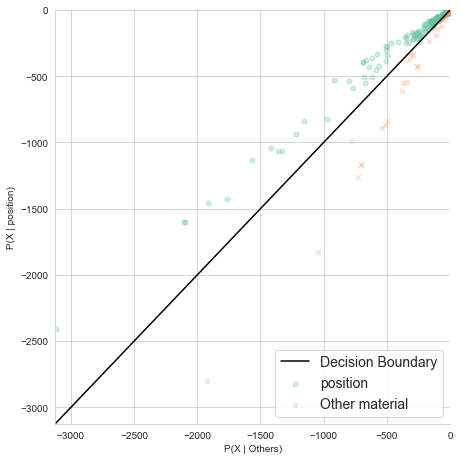

In [2606]:
sns.lmplot(x = xaxis_label, y = yaxis_label, 
           data =summary_df, height = 6.5, 
           fit_reg=False, legend=False, scatter_kws={'alpha': 0.3, 's': 25}, 
           hue = labels, markers = ['o', 'x'], palette = 'Set2' )

plt.xlim([joint_log_ctg_1.min() - 10, 1])
plt.ylim([joint_log_ctg_1.min() - 10, 1])

plt.plot(linedata, linedata, color = 'black')

plt.legend(('Decision Boundary', SUBJECT , 'Other material'), 
           loc='lower right', fontsize = 14)

plt.show()

# False Positives and False Negatives
* The function up.unique() shows the nubmer of value 0 is 2347, the value 1 is 650.

In [2607]:
np.unique(prediction, return_counts = True)

(array([False,  True]), array([241,  33]))

### True positives
* It shows, the document is 1, the True, and model also predicts it as 1, True.
* In this case, the material is fabric in CATEGORY, and the prediction also say it is fabric.

In [2608]:
true_pos = (y_test == 1)&(prediction == 1)

In [2609]:
true_pos.sum()

28

### True negatives
* It shows, the document is 0, the False, and the model also predicts it as 0, False.
* In this case, the material is actually trim in CATEGORY, and the prediction also say it is trim.

In [2610]:
true_neg = (y_test == 0)&(prediction ==0)

In [2611]:
true_neg.sum()

233

### False positives
* It shows, the document is 0, the False, and model predicts it as 1, True.
* In this case, the material is trim in CATEGORY, and yet prediction says it is fabric.

In [2612]:
false_pos = (y_test == 0)&(prediction ==1)

In [2613]:
false_pos.sum()

5

### False negtives
* It shows, the document is 1, the True, and model predicts it as 0, False.
* In this case, the material is fabric in CATEGORY, and yet prediction says it is trim.

In [2614]:
false_neg = (y_test == 1)&(prediction == 0)

In [2615]:
false_neg.sum()

8

In [2616]:
(y_test == 1).sum()

37

# Recall Score
* It tells how much the model will omit the document. More the value close to 1, less the model will omit to fit document.
* It tells the reliability of the model, in other words, how much the model resemble to the relevant documents.
* More the value close to 1, less the model will omit any document.

In [2617]:
recall_score = true_pos.sum() / (y_test == 1).sum()
print('Recall score is {:.2%}'. format(recall_score))

Recall score is 75.68%


# Precision Score
* It tells how precisely the model predicting.

In [2618]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3}'.format(precision_score))

Precision score is 0.848


# F-Score or F1 Score
* Closer the value to 1, better the model is.

In [2619]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))

F Score is 0.8


# Record the result in a CSV file
* Record the result, so I can check the precision of the matrix

In [2620]:
record_file = pd.read_csv(RECORD_FILE, encoding = 'ISO-8859-1', index_col = 'RECORD_ID')

In [2621]:
record_file.tail()

,Csv,Rows,SUBJECT,VOCAB_SIZE,Test_size,True_Positives,True_Negatives,False_Positives,False_Negatives,TRUE_in y_test,Recall_Score,Precision_Score,F1-Score
RECORD_ID,,,,,,,,,,,,,
39,col_classify_matrix_trimed_delete-none-materia...,3820,position,900,0.1,42,227,0,3,47,89.36%,1.000,0.94
40,col_classify_matrix_trimed_delete-none-materia...,3820,position,900,0.1,41,223,4,2,45,91.11%,0.911,0.91
41,col_classify_matrix_trimed_delete-none-materia...,3820,position,900,0.1,45,198,5,5,53,84.91%,0.900,0.87
42,col_classify_matrix_trimed_delete-none-materia...,3820,position,900,0.1,23,250,4,5,28,82.14%,0.852,0.84
43,col_classify_matrix_trimed_delete-none-materia...,3820,position,900,0.1,38,245,4,4,44,86.36%,0.905,0.88


In [2622]:
# For record in cxcel file
new_record = {
    'Csv':MATRIX,
    'Rows':data.shape[0],
    'SUBJECT':SUBJECT,
    'VOCAB_SIZE':VOCAB_SIZE,
    'Test_size':TEST_SIZE,
    'True_Positives':true_pos.sum(),
    'True_Negatives':true_neg.sum(),
    'False_Positives':false_pos.sum(),
    'False_Negatives':false_neg.sum(),
    'TRUE_in y_test':(y_test == 1).sum(),
    'Recall_Score':'{:.2%}'. format(recall_score),
    'Precision_Score':'{:.3}'.format(precision_score),
    'F1-Score':'{:.2}'.format(f1_score),
}

In [2623]:
# the attribute 'name' of the df method .append in this case represents the index column 'RECORD_ID'
record_file = record_file.append(pd.Series(new_record, name = record_file.shape[0]), ignore_index = False)

In [2624]:
record_file.tail()

,Csv,Rows,SUBJECT,VOCAB_SIZE,Test_size,True_Positives,True_Negatives,False_Positives,False_Negatives,TRUE_in y_test,Recall_Score,Precision_Score,F1-Score
RECORD_ID,,,,,,,,,,,,,
40,col_classify_matrix_trimed_delete-none-materia...,3820,position,900,0.1,41,223,4,2,45,91.11%,0.911,0.91
41,col_classify_matrix_trimed_delete-none-materia...,3820,position,900,0.1,45,198,5,5,53,84.91%,0.9,0.87
42,col_classify_matrix_trimed_delete-none-materia...,3820,position,900,0.1,23,250,4,5,28,82.14%,0.852,0.84
43,col_classify_matrix_trimed_delete-none-materia...,3820,position,900,0.1,38,245,4,4,44,86.36%,0.905,0.88
44,col_classify_matrix_trimed_delete-none-materia...,3820,position,900,0.1,28,233,5,8,37,75.68%,0.848,0.8


In [2625]:
# Add time set for record file name.
import datetime
now = datetime.datetime.now()
today = now.strftime('%Y-%m-%d')
print(today)

2020-04-04


## Save the record file
* Here we save 2 copies, 1 for the main file, it will be covered and reused for next time.
* The other is a file with the date of today as backup saving in the directory 'record'

In [2626]:
# Save a copy to the directory 'record'
record_file.to_csv('record/Matrix_and_Trained-data_records_'+ today +'.csv')
# Save and cover the main file.
record_file.to_csv('Matrix_and_Trained-data_records_main-file.csv')